In [89]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression as LR
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import lightgbm as lgb
import optuna.integration.lightgbm as lgb_op
from sklearn.model_selection import train_test_split
from sklearn import metrics
import japanize_matplotlib

In [91]:
df_train = pd.read_csv("./train.csv")
#df_test = pd.read_csv("./test.csv")
#df_sample = pd.read_csv("./sample_submit.csv",header=None)
df_train = df_train.drop(["gameId"],axis="columns")
#df_test = df_test.drop(["gameId"],axis="columns")
display(df_train.head())
#display(df_test.head())
#display(df_sample.head())
print(df_train.info())
#print(df_test.info())

blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0               0          5           8            6                  0   
1               1         10           1            5                  0   
2               0          3          10            2                  0   
3               1          7          10            8                  0   
4               0          4           9            4                  0   

   blueDragons  blueTotalGold  blueTotalExperience  blueWins  
0            0          14536                17256         0  
1            0          14536                17863         0  
2            0          17409                17256         0  
3            0          19558                18201         0  
4            0          17409                17256         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   blueFirstBlood       8000 non-null   int64
 1   blueKills            8000 non-null   int64
 2   blueDeaths           8000 non-null   int64
 3   blueAssists          8000 non-null   int64
 4   blueEliteMonsters    8000 non-null   int64
 5   blueDragons          8000 non-null   int64
 6   blueTotalGold        8000 non-null   int64
 7   blueTotalExperience  8000 non-null   int64
 8   blueWins             8000 non-null   int64
dtypes: int64(9)
memory usage: 562.6 KB
None


In [4]:
df_train = pd.read_csv("./train.csv")
df_train = df_train.drop(["gameId"],axis="columns")
df_train["death_kill"] = df_train["blueDeaths"] -df_train["blueKills"]
display(df_train.head())
#display(df_test.head())
#display(df_sample.head())
print(df_train.info())
#print(df_test.info())

blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0               0          5           8            6                  0   
1               1         10           1            5                  0   
2               0          3          10            2                  0   
3               1          7          10            8                  0   
4               0          4           9            4                  0   

   blueDragons  blueTotalGold  blueTotalExperience  blueWins  death_kill  
0            0          14536                17256         0           3  
1            0          14536                17863         0          -9  
2            0          17409                17256         0           7  
3            0          19558                18201         0           3  
4            0          17409                17256         0           5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   blueFirstBlood       8000 non-null   int64
 1   blueKills            8000 non-null   int64
 2   blueDeaths           8000 non-null   int64
 3   blueAssists          8000 non-null   int64
 4   blueEliteMonsters    8000 non-null   int64
 5   blueDragons          8000 non-null   int64
 6   blueTotalGold        8000 non-null   int64
 7   blueTotalExperience  8000 non-null   int64
 8   blueWins             8000 non-null   int64
 9   death_kill           8000 non-null   int64
dtypes: int64(10)
memory usage: 625.1 KB
None


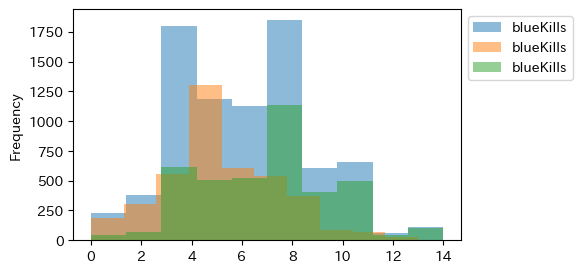

In [6]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train.plot(y="blueKills",kind="hist",bins=10,ax=ax,alpha=0.5)
df_train[df_train["blueWins"]==0].plot(y="blueKills",kind="hist",bins=10,ax=ax,alpha=0.5)
df_train[df_train["blueWins"]==1].plot(y="blueKills",kind="hist",bins=10,ax=ax,alpha=0.5)

plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

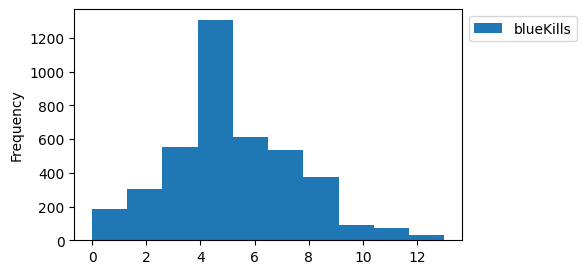

In [12]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train[df_train["blueWins"]==0].plot(y="blueKills",kind="hist",bins=10,ax=ax)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

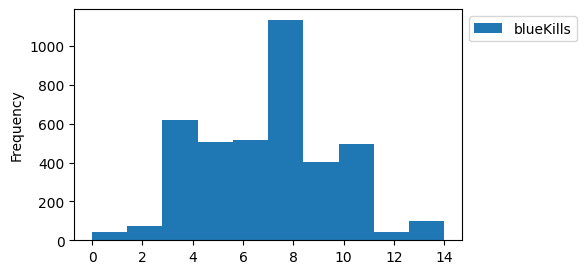

In [14]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train[df_train["blueWins"]==1].plot(y="blueKills",kind="hist",bins=10,ax=ax)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

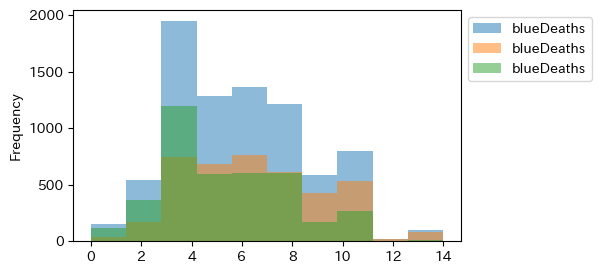

In [8]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train.plot(y="blueDeaths",kind="hist",bins=10,ax=ax,alpha=0.5)
df_train[df_train["blueWins"]==0].plot(y="blueDeaths",kind="hist",bins=10,ax=ax,alpha=0.5)
df_train[df_train["blueWins"]==1].plot(y="blueDeaths",kind="hist",bins=10,ax=ax,alpha=0.5)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

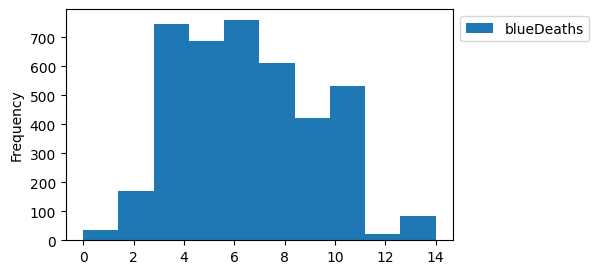

In [18]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train[df_train["blueWins"]==0].plot(y="blueDeaths",kind="hist",bins=10,ax=ax)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

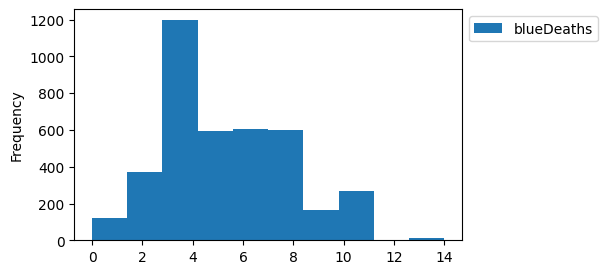

In [20]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train[df_train["blueWins"]==1].plot(y="blueDeaths",kind="hist",bins=10,ax=ax)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

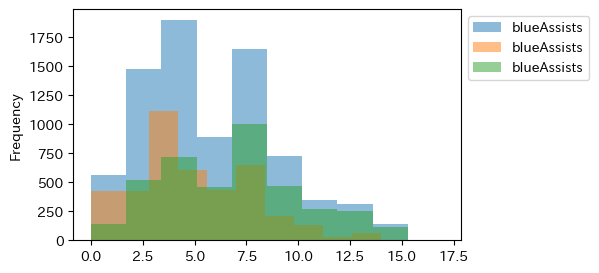

In [10]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train.plot(y="blueAssists",kind="hist",bins=10,ax=ax,alpha=0.5)
df_train[df_train["blueWins"]==0].plot(y="blueAssists",kind="hist",bins=10,ax=ax,grid=True,alpha=0.5)
df_train[df_train["blueWins"]==1].plot(y="blueAssists",kind="hist",bins=10,ax=ax,alpha=0.5)

plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

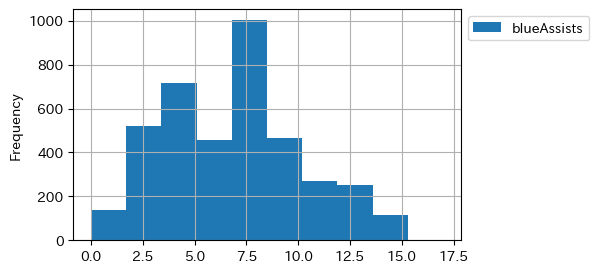

In [33]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train[df_train["blueWins"]==1].plot(y="blueAssists",kind="hist",bins=10,ax=ax,grid=True)

plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

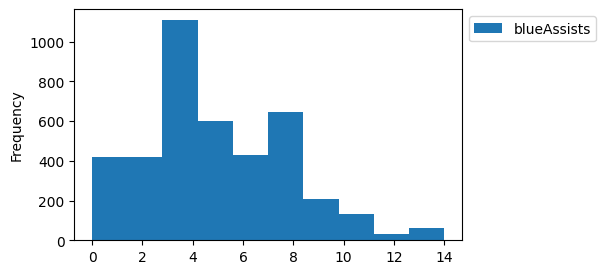

In [26]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train[df_train["blueWins"]==0].plot(y="blueAssists",kind="hist",bins=10,ax=ax)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

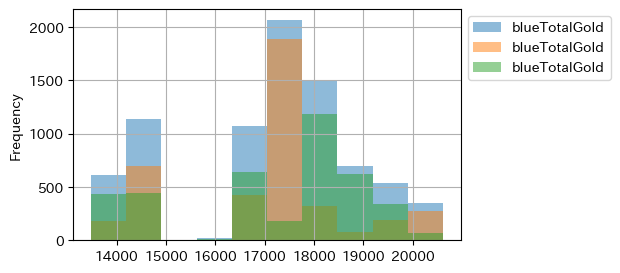

In [14]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train.plot(y="blueTotalGold",kind="hist",bins=10,ax=ax,alpha=0.5,grid=True)
df_train[df_train["blueWins"]==0].plot(y="blueTotalGold",kind="hist",bins=10,ax=ax,grid=True,alpha=0.5)
df_train[df_train["blueWins"]==1].plot(y="blueTotalGold",kind="hist",bins=10,ax=ax,grid=True,alpha=0.5)

plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

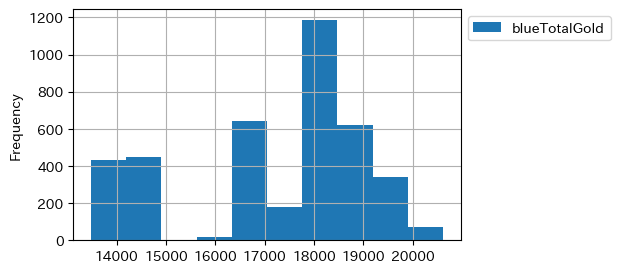

In [43]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train[df_train["blueWins"]==1].plot(y="blueTotalGold",kind="hist",bins=10,ax=ax,grid=True)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

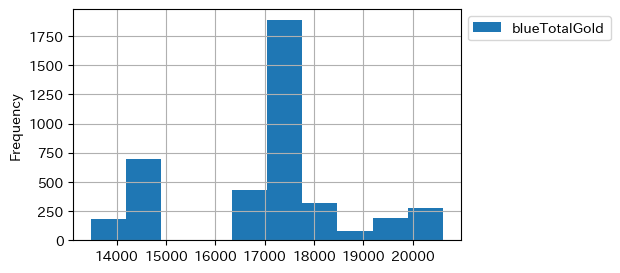

In [45]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
df_train[df_train["blueWins"]==0].plot(y="blueTotalGold",kind="hist",bins=10,ax=ax,grid=True)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

In [16]:
y = df_train[["blueWins"]]
x = df_train[["blueFirstBlood"]]

model = LR()
model.fit(x,y)

print(model.coef_)
print(model.intercept_)
print(model.score(x,y))

[[0.22658217]]
[0.37551335]
0.05131874559675875


In [18]:
y = df_train[["blueWins"]]
x = df_train[["blueEliteMonsters"]]

model = LR()
model.fit(x,y)

print(model.coef_)
print(model.intercept_)
print(model.score(x,y))

[[0.21659369]]
[0.37508722]
0.0744255299801222


In [20]:
y = df_train[["blueWins"]]
x = df_train[["blueDragons"]]

model = LR()
model.fit(x,y)

print(model.coef_)
print(model.intercept_)
print(model.score(x,y))

[[0.26272085]]
[0.3976631]
0.06348226563772075


In [24]:
y = df_train[["blueWins"]]
x = df_train[["blueKills"]]

model = LR()
model.fit(x,y)

print(model.coef_)
print(model.intercept_)
print(model.score(x,y))

[[0.0643164]]
[0.10393816]
0.11393419606253252


In [26]:
y = df_train[["blueWins"]]
x = df_train[["blueDeaths"]]

model = LR()
model.fit(x,y)

print(model.coef_)
print(model.intercept_)
print(model.score(x,y))

[[-0.04477419]]
[0.7569699]
0.05627518513611163


In [28]:
y = df_train[["blueWins"]]
x = df_train[["blueKills"]]

model = LR()
model.fit(x,y)

print(model.coef_)
print(model.intercept_)
print(model.score(x,y))

[[0.0643164]]
[0.10393816]
0.11393419606253252


In [30]:
print(df_train[df_train["blueWins"]==0]["blueEliteMonsters"].value_counts())
print(df_train[df_train["blueWins"]==1]["blueEliteMonsters"].value_counts())

blueEliteMonsters
0    2719
1    1191
2     156
Name: count, dtype: int64
blueEliteMonsters
1    1934
0    1564
2     436
Name: count, dtype: int64


In [32]:
print(df_train[df_train["blueWins"]==0]["blueDragons"].value_counts())
print(df_train[df_train["blueWins"]==1]["blueDragons"].value_counts())

blueDragons
0    3093
1     973
Name: count, dtype: int64
blueDragons
0    2042
1    1892
Name: count, dtype: int64


In [34]:
print(df_train[df_train["blueWins"]==0]["blueKills"].value_counts())
print(df_train[df_train["blueWins"]==1]["blueKills"].value_counts())

blueKills
5     681
4     624
6     610
3     556
7     538
2     305
9     200
8     175
1     115
10     89
11     72
0      71
12     17
13     13
Name: count, dtype: int64
blueKills
7     638
6     519
5     504
8     495
4     478
9     405
11    249
10    248
3     140
13    100
2      71
12     44
1      23
0      19
14      1
Name: count, dtype: int64


In [36]:
print(df_train[df_train["blueWins"]==0]["blueFirstBlood"].value_counts())
print(df_train[df_train["blueWins"]==1]["blueFirstBlood"].value_counts())

blueFirstBlood
0    2433
1    1633
Name: count, dtype: int64
blueFirstBlood
1    2471
0    1463
Name: count, dtype: int64


In [38]:
display(df_train[(df_train["blueWins"]==0) & (df_train["blueKills"] >11)])
print(len(df_train[(df_train["blueWins"]==0) & (df_train["blueKills"] >11)]))

#print(df_train[df_train["blueWins"]==1]["blueFirstBlood"].value_counts())

blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
854                1         13           0            3                  0   
922                1         12           5           13                  1   
1016               1         12           9            9                  0   
1075               1         12           6            4                  0   
1081               1         12           6            9                  1   
1335               1         13           5            5                  2   
1357               1         13           4            6                  2   
1385               1         13           5           14                  1   
1864               1         12           3            4                  1   
1919               1         12           4            7                  1   
2084               1         13           0            3                  0   
3799               1         13           0           12                  0   
4113               1         13           8           14                  0   
4369               1         12           8            7                  0   
4987               1         13           7            8                  0   
5309               1         13           8           11                  1   
5477               1         13           5           11                  0   
5615               1         12           3            9                  2   
5651               1         12           6            7                  0   
5679               1         12           2            7                  0   
6393               1         12           5           13                  1   
6437               1         12           1           11                  1   
6577               1         12           9            2                  0   
6769               1         13          14           14                  1   
6819               1         13           4            5                  2   
6874               1         12           5            1                  0   
7691               1         12           3            0                  0   
7746               1         13          11           14                  0   
7747               1         12           7            6                  0   
7891               1         12           4            9                  0   

      blueDragons  blueTotalGold  blueTotalExperience  blueWins  
854             0          13475                19922         0  
922             1          18274                18491         0  
1016            0          16961                18201         0  
1075            0          14536                17256         0  
1081            0          14536                17256         0  
1335            1          16544                18201         0  
1357            1          18513                18021         0  
1385            0          16961                18201         0  
1864            0          19558                18201         0  
1919            0          13475                17256         0  
2084            0          19558                18201         0  
3799            0          18274                18472         0  
4113            0          20619                19730         0  
4369            0          16961                17119         0  
4987            0          19558                18201         0  
5309            1          18274                18491         0  
5477            0          14536                17119         0  
5615            1          18513                18021         0  
5651            0          14536                17256         0  
5679            0          16961                17119         0  
6393            1          18274                18491         0  
6437            0          19558                18201         0  
6577            0          14536      

30


In [40]:
display(df_train[(df_train["blueWins"]==1) & (df_train["blueKills"] <1)])
print(len(df_train[(df_train["blueWins"]==1) & (df_train["blueKills"] <1)]))

#print(df_train[df_train["blueWins"]==1]["blueFirstBlood"].value_counts())

blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
415                0          0           5            1                  0   
536                0          0           5            0                  0   
552                0          0           6            0                  0   
1382               0          0          10            0                  0   
1532               0          0          10            1                  0   
1568               0          0           9            0                  1   
2029               0          0          11            0                  0   
2150               0          0           6            0                  0   
2818               0          0          10            0                  0   
3422               0          0           3            0                  0   
3499               0          0           8            6                  0   
4326               0          0           6            0                  0   
4965               0          0           4            0                  0   
5027               1          0           5            2                  0   
5948               1          0           1            4                  1   
6446               0          0           5            0                  0   
6933               1          0           3            0                  0   
6954               0          0          10            2                  0   
7067               0          0           6            0                  0   

      blueDragons  blueTotalGold  blueTotalExperience  blueWins  
415             0          13475                18472         1  
536             0          17381                17761         1  
552             0          16961                20004         1  
1382            0          16961                18472         1  
1532            0          20619                17256         1  
1568            1          19558                18472         1  
2029            0          18117                20004         1  
2150            0          14536                17256         1  
2818            0          17409                17256         1  
3422            0          13475                17173         1  
3499            0          17409                17256         1  
4326            0          14536                17256         1  
4965            0          20619                17256         1  
5027            0          16544                18201         1  
5948            1          18274                18472         1  
6446            0          14536                17256         1  
6933            0          19558                18201         1  
6954            0          17409                17256         1  
7067            0          20619                17173         1

19


## 傾向線

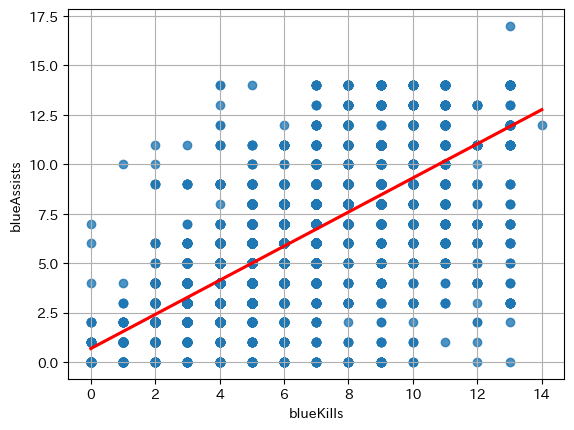

In [42]:
sns.regplot(data=df_train,x="blueKills",y="blueAssists",ci=None,line_kws={"color":"red"})
plt.grid()

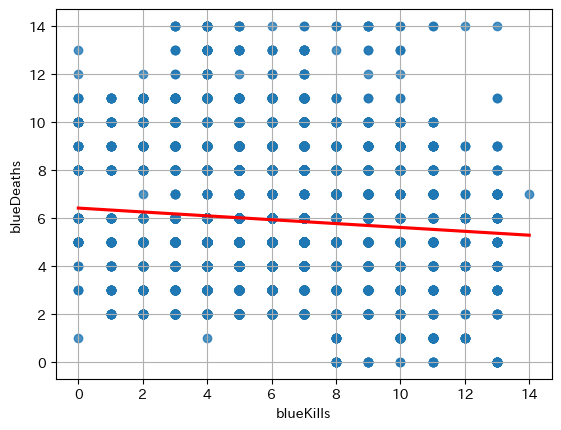

In [46]:
sns.regplot(data=df_train,x="blueKills",y="blueDeaths",ci=None,line_kws={"color":"red"})
plt.grid()

## 重回帰

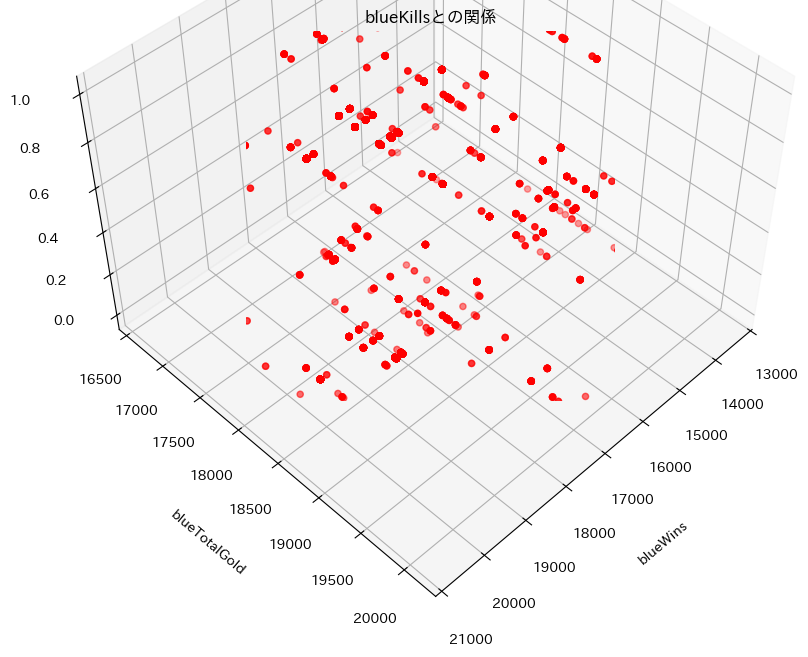

In [8]:
# %matplotlib tk
y = df_train[["blueWins"]]
x1 = df_train[["blueTotalGold"]]
x2 = df_train[["blueTotalExperience"]]

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter3D(x1,x2,y,c="red")

ax.set_title("blueKillsとの関係")
ax.set_xlabel("blueWins")
ax.set_ylabel("blueTotalGold")
ax.set_zlabel("blueTotalExperience")

ax.view_init(45,45)
ax.set_box_aspect(aspect=None,zoom=2.0)
plt.show()

In [10]:
y = df_train[["blueWins"]]
z = df_train[["blueKills","blueAssists"]]

model = LR()
model.fit(z,y)

print(model.coef_)
print(model.intercept_)
print(model.score(z,y))

[[0.0446764  0.02275212]]
[0.08853733]
0.12438280350438524


In [12]:
y = df_train[["blueWins"]]
z = df_train[["blueTotalGold","blueTotalGold"]]

model = LR()
model.fit(z,y)

print(model.coef_)
print(model.intercept_)
print(model.score(z,y))

[[5.55883792e-06 5.55883792e-06]]
[0.30103664]
0.0016393611221077187


## クラスタ分け

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [50]:
df_train.columns

Index(['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueTotalGold',
       'blueTotalExperience', 'blueWins'],
      dtype='object')

In [66]:
df_train_clust = df_train[["blueKills","blueDeaths"]]
display(df_train_clust.head())

blueKills  blueDeaths
0          5           8
1         10           1
2          3          10
3          7          10
4          4           9

In [68]:
sc = StandardScaler()
df_train_clust_sc = sc.fit_transform(df_train_clust)

clusmodel = KMeans(n_clusters=2,n_init=10,random_state=0)
clusters = clusmodel.fit(df_train_clust_sc)
df_train_clust["cluster"] = clusters.labels_

display(df_train_clust.head())

C:\Users\cax68\AppData\Local\Temp\ipykernel_17356\230874317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clust["cluster"] = clusters.labels_


blueKills  blueDeaths  cluster
0          5           8        1
1         10           1        0
2          3          10        1
3          7          10        1
4          4           9        1

In [70]:
df_train_clust.groupby("cluster").mean()

blueKills  blueDeaths
cluster                       
0         5.978603    4.329294
1         6.129092    9.019860

In [78]:
col = ["blueKills_s","blueDeaths_s"]
df_s = pd.DataFrame(df_train_clust_sc,columns=col)
display(df_s.head())

blueKills_s  blueDeaths_s
0    -0.392478      0.783954
1     1.513219     -1.858799
2    -1.154757      1.539026
3     0.369800      1.539026
4    -0.773618      1.161490

In [80]:
df_train_clust2 = pd.concat([df_train_clust,df_s],axis=1)
display(df_train_clust2.head())

blueKills  blueDeaths  cluster  blueKills_s  blueDeaths_s
0          5           8        1    -0.392478      0.783954
1         10           1        0     1.513219     -1.858799
2          3          10        1    -1.154757      1.539026
3          7          10        1     0.369800      1.539026
4          4           9        1    -0.773618      1.161490

<Axes: xlabel='blueKills_s', ylabel='blueDeaths_s'>

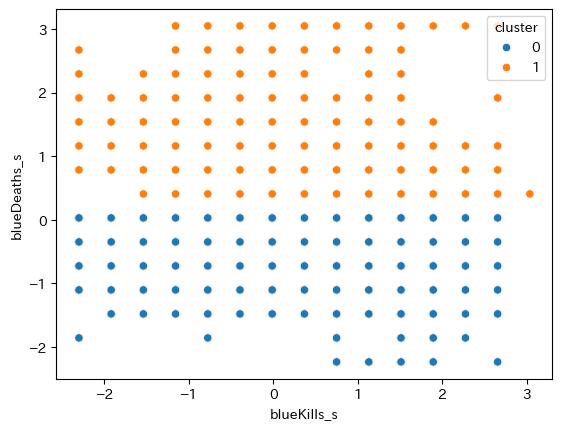

In [82]:
sns.scatterplot(x="blueKills_s",y="blueDeaths_s",hue="cluster",data=df_train_clust2)

In [86]:
blueWins = df_train["blueWins"]
df_train_clust_c2 = pd.concat([df_train_clust2,blueWins],axis=1)
display(df_train_clust_c2.head(10))

blueKills  blueDeaths  cluster  blueKills_s  blueDeaths_s  blueWins
0          5           8        1    -0.392478      0.783954         0
1         10           1        0     1.513219     -1.858799         0
2          3          10        1    -1.154757      1.539026         0
3          7          10        1     0.369800      1.539026         0
4          4           9        1    -0.773618      1.161490         0
5          5          10        1    -0.392478      1.539026         0
6          5           4        0    -0.392478     -0.726191         0
7          8           5        0     0.750940     -0.348654         1
8          5           6        0    -0.392478      0.028882         0
9          7           4        0     0.369800     -0.726191         1